# EXPLORING OUR DATAFRAME

In [1]:
import findspark
findspark.init()

In [3]:
#creer une session Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [5]:
# Chargement du fichier CSV en une dataframe avec spark.read
assurance_df = spark.read.csv("assurance.csv", header=True, inferSchema=True)

In [6]:
#Le shema du data frame
assurance_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Driving_License: integer (nullable = true)
 |-- Region_Code: double (nullable = true)
 |-- Previously_Insured: integer (nullable = true)
 |-- Vehicle_Age: string (nullable = true)
 |-- Vehicle_Damage: string (nullable = true)
 |-- Annual_Premium: double (nullable = true)
 |-- Policy_Sales_Channel: double (nullable = true)
 |-- Vintage: integer (nullable = true)
 |-- Response: integer (nullable = true)



In [7]:
#les 5 premiers ligne du dataframe
assurance_df.limit(5)

id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

### Analyzing Data

In [9]:
#S'assurer qu'il n'y a pas de valeurs null dans notre data
assurance_df_pandas=assurance_df.toPandas()
assurance_df_pandas.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
assurance_df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int32  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int32  
 3   Driving_License       381109 non-null  int32  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int32  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int32  
 11  Response              381109 non-null  int32  
dtypes: float64(3), int32(6), object(3)
memory usage: 26.2+ MB


<AxesSubplot:xlabel='Response', ylabel='count'>

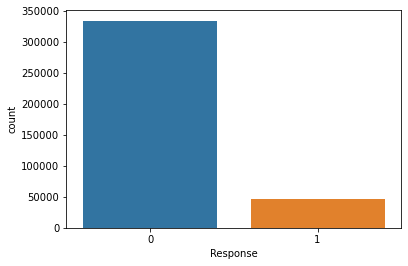

In [13]:
#Visualisation des valeur de notre colone target "Response"
sns.countplot(x="Response",data=assurance_df_pandas)

Notre data n'est pas equilibré, est il existe plusieurs methodes qui s'occuppe de ce probleme, je cite le Bootsrapping, et le Boosting.   

<AxesSubplot:xlabel='Response', ylabel='count'>

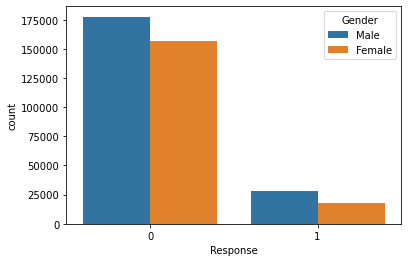

In [14]:
#Visualisation de la distribution des valeurs de la colone Gender par rapport a Response
sns.countplot(x="Response",hue="Gender",data=assurance_df_pandas)

<AxesSubplot:xlabel='Response', ylabel='count'>

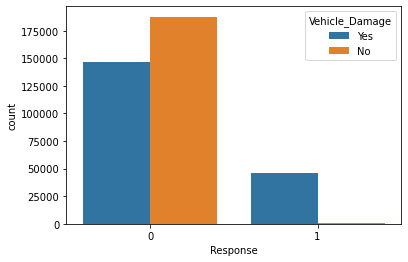

In [15]:
#Visualisation de la distribution des valeurs de la colone Vehicule_Damage par rapport a Response
sns.countplot(x="Response",hue="Vehicle_Damage",data=assurance_df_pandas)

<AxesSubplot:xlabel='Response', ylabel='count'>

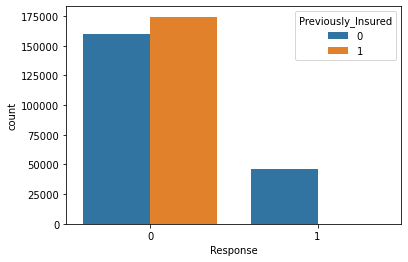

In [16]:
#Visualisation de la distribution des valeurs de la colone Previously_Insured par rapport a Response
sns.countplot(x="Response",hue="Previously_Insured",data=assurance_df_pandas)

<AxesSubplot:xlabel='Response', ylabel='count'>

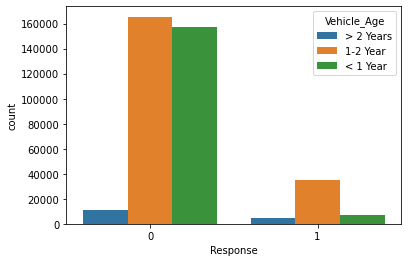

In [17]:
#Visualisation de la distribution des valeurs de la colone Vehicle_Age par rapport a Response
sns.countplot(x="Response",hue="Vehicle_Age",data=assurance_df_pandas)

In [2]:
#Visualisation de la distribution des valeurs de la colone Driving_License par rapport a Response
sns.countplot(x="Response",hue="Driving_License",data=assurance_df_pandas)

NameError: name 'sns' is not defined

## the Spark SQL quary 

In [11]:
# Enregistrez le DataFrame en tant que vue temporaire SQL "assDF"
assurance_df.createOrReplaceTempView("assDF")


In [12]:
#Affichage de nombre des utilisateurs ayant un permis de conduire 
Driving_License_number=spark.sql("select count(*)  from assDF where Driving_License=1")
Driving_License_number

count(1)
380297


In [13]:
#Affichage de combien des utilisateurs qui n'ont pas de permis
NODriving_License_number=spark.sql("select count(*)  from assDF where Driving_License=0")
NODriving_License_number

count(1)
812


In [14]:
#l'affichage du nombre des utilisateurs qui ont recu une reponse d'acceptation du dossier d'assurance
RESPONE1=spark.sql("select count(*)  from assDF where Response=1")
RESPONE1

count(1)
46710


In [15]:
RESPONE0=spark.sql("select count(*)  from assDF where Response=0")
RESPONE0

count(1)
334399


In [16]:
line_number=spark.sql("select count(*)  from assDF")
line_number

count(1)
381109


In [17]:
#question1
Women_insured = spark.sql("select count(*)  from assDF where Previously_Insured=1 and Gender = 'Female' ")
print("the number of insured women is :")
Women_insured.show()

the number of insured women is :
+--------+
|count(1)|
+--------+
|   87949|
+--------+



In [18]:
two_years_cars=spark.sql("select count(*)  from assDF where Vehicle_Age='> 2 Years' and Gender = 'Female' ")
print("number of women having vehicles over 2 years old")
two_years_cars

number of women having vehicles over 2 years old


count(1)
5707


In [19]:
mean_Annual_Premium=spark.sql("select AVG(Annual_Premium)  from assDF where Vehicle_Damage='Yes' and Gender = 'Male' ")
print("Mean Value of the the annual premium for Men with damage vehicle ")
two_years_cars

Mean Value of the the annual premium for Men with damage vehicle 


count(1)
5707


In [20]:
newDF=spark.sql("""select id , Gender, Age , Vehicle_Age , Annual_Premium , Response 
                    from assDF  """)
newDF

id,Gender,Age,Vehicle_Age,Annual_Premium,Response
1,Male,44,> 2 Years,40454.0,1
2,Male,76,1-2 Year,33536.0,0
3,Male,47,> 2 Years,38294.0,1
4,Male,21,< 1 Year,28619.0,0
5,Female,29,< 1 Year,27496.0,0
6,Female,24,< 1 Year,2630.0,0
7,Male,23,< 1 Year,23367.0,0
8,Female,56,1-2 Year,32031.0,1
9,Female,24,< 1 Year,27619.0,0
10,Female,32,< 1 Year,28771.0,0


In [29]:
#first methode of conversion to JSON with pyspark 
dfJson=newDF.toJSON()
dfJson

MapPartitionsRDD[148] at toJavaRDD at NativeMethodAccessorImpl.java:0

# PREPROCESSING

In [31]:
#for making sure that there only two values in this column(Yes/No)
VDamageValues=spark.sql("select DISTINCT Vehicle_Damage   from assDF")
VDamageValues

Vehicle_Damage
No
Yes


In [32]:
#it will add a column named Vehicle_Damage01 and it will fill it with 1 if the condition is true and 0 if not.
def Convert_Veh_Dam(df):
    df1=df.withColumn("Vehicle_Damage01", (df["Vehicle_Damage"]=='Yes').cast("int"))
    df2=df1.drop('Vehicle_Damage') 
    return df2
    

In [33]:
DF_Veh_Dam=Convert_Veh_Dam(assurance_df)

In [34]:
DF_Veh_Dam

id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage01
1,Male,44,1,28.0,0,> 2 Years,40454.0,26.0,217,1,1
2,Male,76,1,3.0,0,1-2 Year,33536.0,26.0,183,0,0
3,Male,47,1,28.0,0,> 2 Years,38294.0,26.0,27,1,1
4,Male,21,1,11.0,1,< 1 Year,28619.0,152.0,203,0,0
5,Female,29,1,41.0,1,< 1 Year,27496.0,152.0,39,0,0
6,Female,24,1,33.0,0,< 1 Year,2630.0,160.0,176,0,1
7,Male,23,1,11.0,0,< 1 Year,23367.0,152.0,249,0,1
8,Female,56,1,28.0,0,1-2 Year,32031.0,26.0,72,1,1
9,Female,24,1,3.0,1,< 1 Year,27619.0,152.0,28,0,0
10,Female,32,1,6.0,1,< 1 Year,28771.0,152.0,80,0,0


In [35]:
from pyspark.sql.functions import udf
Convert_Veh_DamUDF = udf(lambda z: Convert_Veh_Dam(z))

In [36]:
ageValues=spark.sql("select DISTINCT Vehicle_Age   from assDF")
ageValues

Vehicle_Age
> 2 Years
< 1 Year
1-2 Year


In [37]:
def Convert_Veh_Age(df):
    df1=df.withColumn("Vehicle_Age< 1 Year", (df["Vehicle_Age"]=='< 1 Year').cast("int"))
    df2=df1.withColumn("Vehicle_Age1-2 Year", (df["Vehicle_Age"]=='1-2 Year').cast("int"))
    df3=df2.withColumn("Vehicle_Age> 2 Years", (df["Vehicle_Age"]=='> 2 Years').cast("int"))  
    df4=df3.drop('Vehicle_Age')
    return df4

In [38]:
DF_Veh_Age=Convert_Veh_Age(DF_Veh_Dam)


In [39]:
DF_Veh_Age

id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage01,Vehicle_Age< 1 Year,Vehicle_Age1-2 Year,Vehicle_Age> 2 Years
1,Male,44,1,28.0,0,40454.0,26.0,217,1,1,0,0,1
2,Male,76,1,3.0,0,33536.0,26.0,183,0,0,0,1,0
3,Male,47,1,28.0,0,38294.0,26.0,27,1,1,0,0,1
4,Male,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,0
5,Female,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0
6,Female,24,1,33.0,0,2630.0,160.0,176,0,1,1,0,0
7,Male,23,1,11.0,0,23367.0,152.0,249,0,1,1,0,0
8,Female,56,1,28.0,0,32031.0,26.0,72,1,1,0,1,0
9,Female,24,1,3.0,1,27619.0,152.0,28,0,0,1,0,0
10,Female,32,1,6.0,1,28771.0,152.0,80,0,0,1,0,0


In [40]:
from pyspark.sql.functions import udf
Convert_Veh_AgeUDF = udf(lambda z: Convert_Veh_Age(z))

In [41]:
def Convert_Gender(df):
    df1=df.withColumn("Female", (df["Gender"]=='Female').cast("int"))
    df2=df1.withColumn("Male", (df["Gender"]=='Male').cast("int"))
    df3=df2.drop('Gender') 
    return df3

In [42]:
DF_Gender=Convert_Gender(DF_Veh_Age)


In [43]:
DF_Gender

id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage01,Vehicle_Age< 1 Year,Vehicle_Age1-2 Year,Vehicle_Age> 2 Years,Female,Male
1,44,1,28.0,0,40454.0,26.0,217,1,1,0,0,1,0,1
2,76,1,3.0,0,33536.0,26.0,183,0,0,0,1,0,0,1
3,47,1,28.0,0,38294.0,26.0,27,1,1,0,0,1,0,1
4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,0,0,1
5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0,1,0
6,24,1,33.0,0,2630.0,160.0,176,0,1,1,0,0,1,0
7,23,1,11.0,0,23367.0,152.0,249,0,1,1,0,0,0,1
8,56,1,28.0,0,32031.0,26.0,72,1,1,0,1,0,1,0
9,24,1,3.0,1,27619.0,152.0,28,0,0,1,0,0,1,0
10,32,1,6.0,1,28771.0,152.0,80,0,0,1,0,0,1,0


In [44]:
from pyspark.sql.functions import udf
Convert_GenderUDF = udf(lambda z: Convert_Gender(z))

In [45]:
numerical_DF=DF_Gender

In [46]:
dataframe = numerical_DF.toPandas()
from matplotlib import pyplot
dataframe.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('gnuplot'))
#we can see that there no such a remarquable correlation between variables.
 




,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage01,Vehicle_Age< 1 Year,Vehicle_Age1-2 Year,Vehicle_Age> 2 Years,Female,Male
id,1.0,0.00096,-0.00056,-0.00016,0.0025,0.0029,-0.0024,-0.00063,-0.0014,-0.0015,-0.0012,0.0014,-0.00046,-0.001,0.001
Age,0.00096,1.0,-0.065,0.013,-0.27,0.099,-0.65,-0.0016,0.14,0.28,-0.83,0.74,0.21,-0.16,0.16
Driving_License,-0.00056,-0.065,1.0,0.00053,0.015,-0.014,0.045,-0.00085,0.01,-0.017,0.04,-0.037,-0.0062,0.018,-0.018
Region_Code,-0.00016,0.013,0.00053,1.0,-0.0039,-0.037,-0.015,-0.0029,0.0012,0.0077,-0.015,0.015,0.0014,0.0017,-0.0017
Previously_Insured,0.0025,-0.27,0.015,-0.0039,1.0,-0.03,0.21,0.0025,-0.34,-0.82,0.36,-0.28,-0.19,0.082,-0.082
Annual_Premium,0.0029,0.099,-0.014,-0.037,-0.03,1.0,-0.2,-0.00014,0.034,0.042,-0.07,0.037,0.08,-0.018,0.018
Policy_Sales_Channel,-0.0024,-0.65,0.045,-0.015,0.21,-0.2,1.0,0.00019,-0.14,-0.21,0.62,-0.55,-0.15,0.12,-0.12
Vintage,-0.00063,-0.0016,-0.00085,-0.0029,0.0025,-0.00014,0.00019,1.0,-0.0011,-0.0021,0.0024,-0.0026,0.0006,0.0025,-0.0025
Response,-0.0014,0.14,0.01,0.0012,-0.34,0.034,-0.14,-0.0011,1.0,0.35,-0.21,0.16,0.11,-0.052,0.052
Vehicle_Damage01,-0.0015,0.28,-0.017,0.0077,-0.82,0.042,-0.21,-0.0021,0.35,1.0,-0.37,0.28,0.21,-0.092,0.092


# MODELS TRAININIG

### Using Scikit-Learn

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
dataframe = numerical_DF.toPandas()

In [49]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int32  
 1   Age                   381109 non-null  int32  
 2   Driving_License       381109 non-null  int32  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int32  
 5   Annual_Premium        381109 non-null  float64
 6   Policy_Sales_Channel  381109 non-null  float64
 7   Vintage               381109 non-null  int32  
 8   Response              381109 non-null  int32  
 9   Vehicle_Damage01      381109 non-null  int32  
 10  Vehicle_Age< 1 Year   381109 non-null  int32  
 11  Vehicle_Age1-2 Year   381109 non-null  int32  
 12  Vehicle_Age> 2 Years  381109 non-null  int32  
 13  Female                381109 non-null  int32  
 14  Male                  381109 non-null  int32  
dtype

In [50]:
#spliting data into data and target
X=dataframe.drop('Response',axis=1)
Y=dataframe['Response']

In [51]:
from sklearn.model_selection import train_test_split
#Splitting the data ( X and Y )into ( training and testing ) data
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size=0.4 , random_state=218 )

### Using ML Spark 

In [52]:
#Vectorizing the DataFrame 
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(inputCols=['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Vehicle_Damage01', 'Vehicle_Age< 1 Year', 'Vehicle_Age1-2 Year', 'Vehicle_Age> 2 Years', 'Female', 'Male'],outputCol='features')

In [53]:
df_final = assembler.transform(numerical_DF)

In [54]:
df_final.limit(5)

id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage01,Vehicle_Age< 1 Year,Vehicle_Age1-2 Year,Vehicle_Age> 2 Years,Female,Male,features
1,44,1,28.0,0,40454.0,26.0,217,1,1,0,0,1,0,1,"[44.0,1.0,28.0,0...."
2,76,1,3.0,0,33536.0,26.0,183,0,0,0,1,0,0,1,"[76.0,1.0,3.0,0.0..."
3,47,1,28.0,0,38294.0,26.0,27,1,1,0,0,1,0,1,"[47.0,1.0,28.0,0...."
4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,0,0,1,"[21.0,1.0,11.0,1...."
5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0,1,0,"[29.0,1.0,41.0,1...."


In [55]:
dataset1 = df_final.select('features','Response')
dataset2 = dataset1.withColumnRenamed("Response", "label")

In [56]:
train,test = dataset2.randomSplit([0.7,0.3])

## LOGISTIC REGRESSION Model

### Logistic Regression with Scikit-Learn

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
LogRegmodel=LogisticRegression()

In [59]:
LogRegmodel.fit(X_train,Y_train)

LogisticRegression()

In [60]:
predictions = LogRegmodel.predict(X_test)

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    133635
           1       0.00      0.00      0.00     18809

    accuracy                           0.88    152444
   macro avg       0.44      0.50      0.47    152444
weighted avg       0.77      0.88      0.82    152444



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(Y_test,predictions)

array([[133635,      0],
       [ 18809,      0]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(Y_test,predictions)

0.8766169872215371

### Logistic Regression with ML PySpark

In [67]:
from pyspark.ml.classification import LogisticRegression

In [68]:
LR = LogisticRegression()

In [69]:
LRmodel = LR.fit(train)

In [70]:
LRpredictions = LRmodel.transform(test)
LRpredictions

features,label,rawPrediction,probability,prediction
"(13,[0,1,4,5,6,8,...",0,[3.96366144275323...,[0.98136058329083...,0.0
"(13,[0,1,4,5,6,9,...",0,[2.63410699214575...,[0.93302465079642...,0.0
"(13,[0,1,4,5,6,9,...",0,[2.72874956147039...,[0.93870192562913...,0.0
"(13,[0,1,4,5,6,9,...",0,[3.27414056906613...,[0.96353094701077...,0.0
"(13,[0,1,4,5,6,9,...",0,[2.67381078656977...,[0.93546347666059...,0.0
"(13,[0,1,4,5,6,9,...",0,[2.82264352299563...,[0.94388724268969...,0.0
"(13,[0,1,4,5,6,9,...",0,[2.67598530650919...,[0.93559463157724...,0.0
"(13,[0,1,4,5,6,9,...",0,[2.62910948838649...,[0.93271168190005...,0.0
"(13,[0,1,4,5,6,9,...",0,[2.74211128786392...,[0.93946627580474...,0.0
"(13,[0,1,4,5,6,9,...",0,[2.72679823711521...,[0.93858954905076...,0.0


## Naive Bayes Model 

### Naive Bayes with Scikit-Learn 

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
model = GaussianNB()

In [73]:
model.fit(X_train,Y_train)

GaussianNB()

In [74]:
GaussianNB()

GaussianNB()

In [75]:
model.score(X_test,Y_test)

0.8759347694891239

In [76]:
#X_test[0:10]

In [77]:
#Y_test[0:10]

In [78]:
#All Data
NB_predict=model.predict(X_test)

In [79]:
#Using just the first 10 elements
#model.predict(X_test[0:10])
NB_predict[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
#Predict the probability for the variables of our Data
NB_probability=model.predict_proba(X_test)

In [81]:
#Showing the first 10 elements only
#model.predict_proba(X_test[:10])
NB_probability[:10]

array([[0.876977  , 0.123023  ],
       [0.84118554, 0.15881446],
       [0.94923839, 0.05076161],
       [0.78187377, 0.21812623],
       [0.78340685, 0.21659315],
       [0.88719232, 0.11280768],
       [0.93707973, 0.06292027],
       [0.69127583, 0.30872417],
       [0.91317887, 0.08682113],
       [0.87250924, 0.12749076]])

In [82]:
#Calculate the score using cross validation
#from sklearn.model_selection import cross_val_score
#cross_val_score(GaussianNB(),X_train, Y_train, cv=5)

In [83]:
#printing the classification report of the model
print(classification_report(Y_test , NB_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    133635
           1       0.30      0.00      0.01     18809

    accuracy                           0.88    152444
   macro avg       0.59      0.50      0.47    152444
weighted avg       0.81      0.88      0.82    152444



### Naive Bayes with ML Spark 

In [84]:
from pyspark.ml.classification import NaiveBayes

In [85]:
NB = NaiveBayes()

In [86]:
NBmodel = NB.fit(train)

In [87]:
NBpredictions = NBmodel.transform(test)
NBpredictions

features,label,rawPrediction,probability,prediction
"(13,[0,1,4,5,6,8,...",0,[-1624.4286125114...,"[1.0,3.8344637827...",0.0
"(13,[0,1,4,5,6,9,...",0,[-875.95484366412...,[0.99999936209569...,0.0
"(13,[0,1,4,5,6,9,...",0,[-1712.3876930229...,[0.99999541162633...,0.0
"(13,[0,1,4,5,6,9,...",0,[-2150.2072286053...,[0.99999999999999...,0.0
"(13,[0,1,4,5,6,9,...",0,[-2358.7592537747...,"[1.0,4.3446677903...",0.0
"(13,[0,1,4,5,6,9,...",0,[-2060.0000614473...,"[1.0,1.0683001927...",0.0
"(13,[0,1,4,5,6,9,...",0,[-1590.9312923083...,[0.99999997992960...,0.0
"(13,[0,1,4,5,6,9,...",0,[-1461.9789846717...,[0.99996158132253...,0.0
"(13,[0,1,4,5,6,9,...",0,[-1934.4041651680...,[0.99999999951553...,0.0
"(13,[0,1,4,5,6,9,...",0,[-874.47122248874...,[0.99326585673025...,0.0


## SVM Model

### Using SCIKIT-LEARN 

In [88]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [89]:
#Generating the SVM model 
SVM_Classifier = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5,max_iter=1000))

In [90]:
#fiting the training data
SVM_Classifier.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [91]:
#predict the response for the X_test data
SVM_predict = SVM_Classifier.predict( X_test )

In [92]:
from sklearn.metrics import accuracy_score
#printing the accuracy score of the model
print("accuracy : " ,accuracy_score(Y_test , SVM_predict))

accuracy :  0.8766104274356485


In [93]:
#printing the classification report of the model
print(classification_report(Y_test , SVM_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    133635
           1       0.00      0.00      0.00     18809

    accuracy                           0.88    152444
   macro avg       0.44      0.50      0.47    152444
weighted avg       0.77      0.88      0.82    152444



In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
print(confusion_matrix(Y_test,SVM_predict))

[[133634      1]
 [ 18809      0]]


### Using ML library of SPARK

In [96]:
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(inputCols=['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Vehicle_Damage01', 'Vehicle_Age< 1 Year', 'Vehicle_Age1-2 Year', 'Vehicle_Age> 2 Years', 'Female', 'Male'],outputCol='features')

In [97]:
df_final = assembler.transform(numerical_DF)

In [98]:
df_final.limit(5)

id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage01,Vehicle_Age< 1 Year,Vehicle_Age1-2 Year,Vehicle_Age> 2 Years,Female,Male,features
1,44,1,28.0,0,40454.0,26.0,217,1,1,0,0,1,0,1,"[44.0,1.0,28.0,0...."
2,76,1,3.0,0,33536.0,26.0,183,0,0,0,1,0,0,1,"[76.0,1.0,3.0,0.0..."
3,47,1,28.0,0,38294.0,26.0,27,1,1,0,0,1,0,1,"[47.0,1.0,28.0,0...."
4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,0,0,1,"[21.0,1.0,11.0,1...."
5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0,1,0,"[29.0,1.0,41.0,1...."


In [99]:
dataset1 = df_final.select('features','Response')
dataset2 = dataset1.withColumnRenamed("Response", "label")

In [100]:
train,test = dataset2.randomSplit([0.7,0.3])

In [101]:
from pyspark.ml.classification import LinearSVC

In [102]:
LSVC = LinearSVC(maxIter=10, regParam=0.1)

In [103]:
LSVCmodel = LSVC.fit(train)

In [104]:
LSVCpredictions = LSVCmodel.transform(test)
LSVCpredictions

features,label,rawPrediction,prediction
"(13,[0,1,4,5,6,9,...",0,[1.32583247045928...,0.0
"(13,[0,1,4,5,6,9,...",0,[1.32775529844165...,0.0
"(13,[0,1,4,5,6,9,...",0,[1.32886945071393...,0.0
"(13,[0,1,4,5,6,9,...",0,[1.33327016547218...,0.0
"(13,[0,1,4,5,6,9,...",0,[1.33460602204155...,0.0
"(13,[0,1,4,5,6,9,...",0,[1.33467652191121...,0.0
"(13,[0,1,4,5,6,9,...",0,[1.34020376110334...,0.0
"(13,[0,1,4,5,6,9,...",0,[1.32601579271270...,0.0
"(13,[0,1,4,5,6,9,...",0,[1.32855052232940...,0.0
"(13,[0,1,4,5,6,9,...",0,[1.32917893899202...,0.0


# EVALUATING MODELS : Logistic Regression / Naive Bayes / SVM

In [105]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [106]:
#LOGISTIC REGRESSION
evaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction")
accuracy=evaluator.evaluate(LRpredictions,{evaluator.metricName:"accuracy"})
print('Precision : ',accuracy )

Precision :  0.8784791752288845


In [107]:
#NAIVE BAYES
evaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction")
accuracy=evaluator.evaluate(NBpredictions,{evaluator.metricName:"accuracy"})
print('Precision : ',accuracy )

Precision :  0.6674157696377198


In [108]:
#SUPPORT VECTOR MACHINE SVM
evaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction")
accuracy=evaluator.evaluate(LSVCpredictions,{evaluator.metricName:"accuracy"})
print('Precision : ',accuracy )

Precision :  0.8768728390318863


#### We can notice that the accuracy of the Naive Bayes is the smalest one, and here we can eleminate it from our best classification models list of this dataframe, and we also see that the logistic regression is the one with the highest precision comparing to the SVM Model one with a small value difference between them, so we can conclude that the Logistic Regression is the best model between all of these tree models.  